In [1]:
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Mall_Customers.csv')

In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df.isnull().sum().sum()

0

<AxesSubplot:>

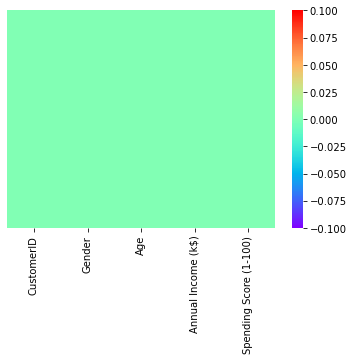

In [5]:
sbn.heatmap(df.isnull(),yticklabels=False,cmap='rainbow')

<h3> Removing Warning

In [6]:
import warnings
warnings.filterwarnings('ignore')

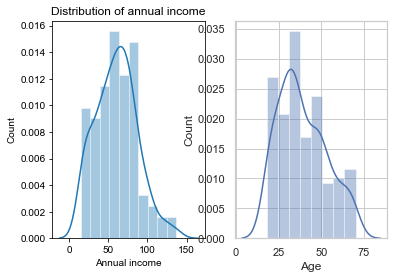

In [7]:

plt.subplot(1,2,1)
sbn.set(style='whitegrid')
sbn.distplot(df['Annual Income (k$)'])
plt.title('Distribution of annual income')
plt.xlabel('Annual income')
plt.ylabel('Count')

plt.subplot(1,2,2)
sbn.set(style='whitegrid')
sbn.distplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

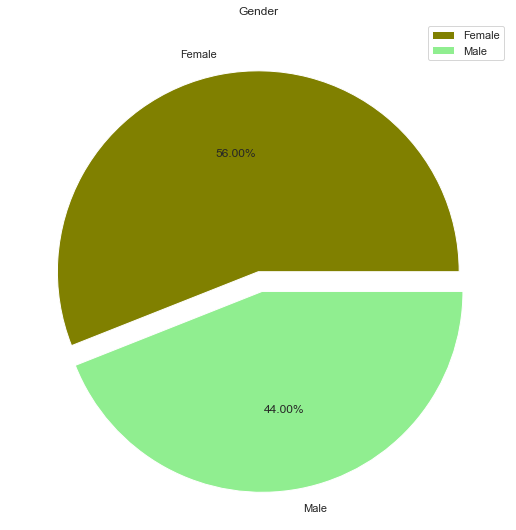

In [8]:
labels=['Female', 'Male']
size=df['Gender'].value_counts()
colors=['olive','lightgreen']
explode=[0,0.1]
plt.figure(figsize=(9,10))
plt.pie(x=size,colors=colors,labels=labels,explode=explode,autopct='%0.2f%%')
plt.title('Gender')
plt.legend()
plt.show()

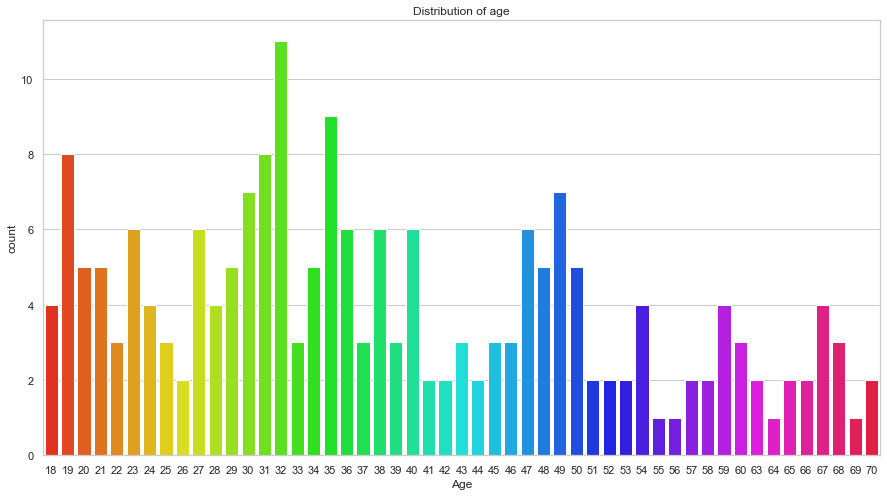

In [9]:
plt.figure(figsize=(15,8))
sbn.countplot(df['Age'], palette='hsv')
plt.title('Distribution of age')
plt.show()

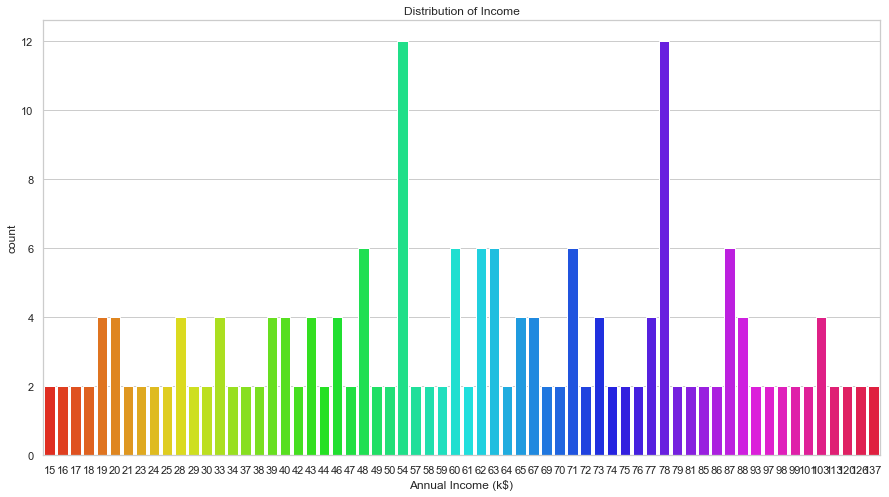

In [10]:
plt.figure(figsize=(15,8))
sbn.countplot(df['Annual Income (k$)'], palette='hsv')
plt.title('Distribution of Income')
plt.show()

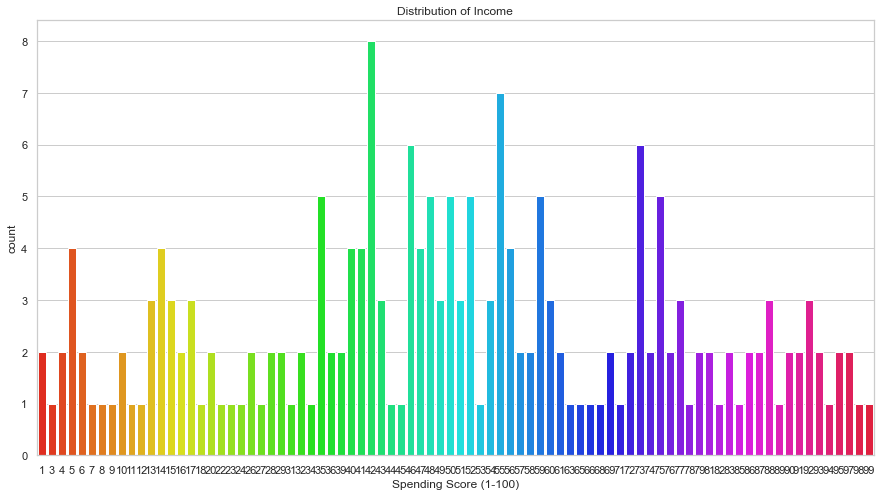

In [11]:
plt.figure(figsize=(15,8))
sbn.countplot(df['Spending Score (1-100)'], palette='hsv')
plt.title('Distribution of Income')
plt.show()

<h3> Clustering

In [12]:
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [13]:
from sklearn.cluster import KMeans

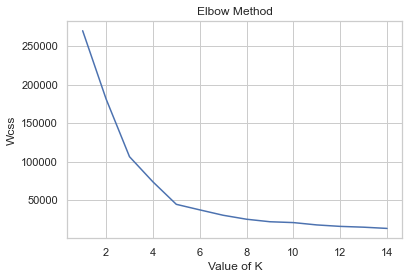

In [14]:
wcss=[]
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(1,15),wcss)
plt.title('Elbow Method')
plt.xlabel('Value of K')
plt.ylabel('Wcss')
plt.show()

In [15]:
### Kmeans Visualization

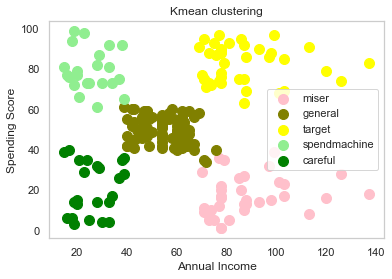

In [16]:
km=KMeans(n_clusters=5,init='k-means++',max_iter=300, n_init=10, random_state=0)
ymean=km.fit_predict(x)
plt.scatter(x[ymean==0,0], x[ymean==0,1],s=100,c='pink',label='miser')
plt.scatter(x[ymean==1,0], x[ymean==1,1],s=100,c='olive',label='general')
plt.scatter(x[ymean==2,0], x[ymean==2,1],s=100,c='yellow',label='target')
plt.scatter(x[ymean==3,0], x[ymean==3,1],s=100,c='lightgreen',label='spendmachine')
plt.scatter(x[ymean==4,0], x[ymean==4,1],s=100,c='green',label='careful')
plt.title("Kmean clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.grid()